# Car Price Prediction Multiple Linear Regression

## DATASET: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## 1. 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## 2. EDA & 전처리

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 2-1. 이상치 제거

<AxesSubplot:>

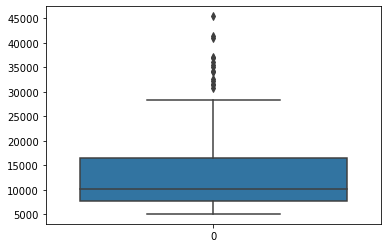

In [6]:
sns.boxplot(data=data['price'])

In [7]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
quantile_25=np.quantile(data['price'],0.25)
quantile_75=np.quantile(data['price'],0.75)
IQR=quantile_75-quantile_25
min=quantile_25-1.5*IQR
max=quantile_75+1.5*IQR
new_data=data[(min<=data['price'])&(data['price']<=max)]

In [9]:
new_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:>

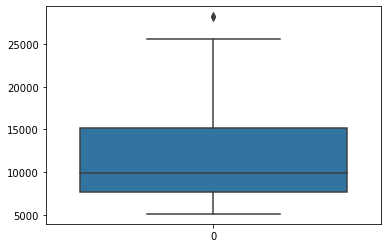

In [10]:
sns.boxplot(data=new_data['price'])

## 2-2. 'CarName' 칼럼 정리 & 오타 수정

In [11]:
A=new_data['CarName'].str.split(' ',expand=True)
new_data['brand']=A[0]
new_data=new_data.drop(['car_ID','CarName'],axis=1)
new_data.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23300\880677001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['brand']=A[0]


(190, 25)

In [12]:
new_data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [13]:
new_data['brand']=new_data['brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

## 2-3. 문자인 칼럼만 One-Hot Encoder 사용

In [14]:
data_obj=new_data.select_dtypes(include='object')
data_num=new_data.select_dtypes(exclude='object')
print('object_col:', data_obj.columns)
print('num_col:', data_num.columns)
print('object_shape:', data_obj.shape)
print('num_shape:', data_num.shape)

object_col: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'brand'],
      dtype='object')
num_col: Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
object_shape: (190, 10)
num_shape: (190, 15)


In [15]:
data_dum=pd.get_dummies(data_obj,drop_first=True)
print('data_dum_shape:', data_dum.shape)

data_dum_shape: (190, 45)


In [16]:
total=pd.concat([data_dum,data_num],axis=1)
print('total_shape',total.shape)

total_shape (190, 60)


## 3. LGBMRegressor의 하이퍼파라미터를 BayesianOptimization으로 결정

### 3-1. test 데이터셋 분리

In [17]:
X,test=train_test_split(total,test_size=0.2,random_state=0)

In [18]:
X_2=X.drop('price',axis=1)
y=X['price']

In [19]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [20]:
lgbm_parameter_bounds = {
    'learning_rate':(0.001,0.01),
    'n_estimators' : (10,1000),
    'max_depth' : (1,10),
    'subsample' : (0.1,1),
    'colsample_bytree' : (0.5,1),
    'num_leaves': (24, 45),
    }

### 3-2. BayesianOptimization으로 점수 측정

In [21]:
def lgbm_bo(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves):
    lgbm_params = {
        'learning_rate' : float(learning_rate),
        'n_estimators' : int(n_estimators),
        'max_depth' : int(max_depth),
        'subsample' : float(subsample),
        'colsample_bytree' : float(colsample_bytree),
        'num_leaves' : int(num_leaves),
    }
    lgbm = LGBMRegressor(**lgbm_params)
    X_train, X_valid, y_train, y_valid = train_test_split(X_2, y, test_size = 0.2)
    lgbm.fit(X_train, y_train)
    mse_score = cross_val_score(lgbm, X_valid, y_valid, scoring = 'neg_mean_squared_error', cv = 5)
    score = np.mean(mse_score)
    return score

In [22]:
BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds, random_state = 0)

#학습 시작
BO_lgbm.maximize(init_points = 10, n_iter = 100)

max_params = BO_lgbm.max['params']
max_params['learning_rate'] = float(max_params['learning_rate'])
max_params['n_estimators'] = int(max_params['n_estimators'])
max_params['max_depth'] = int(max_params['max_depth'])
max_params['subsample'] = float(max_params['subsample'])
max_params['colsample_bytree'] = float(max_params['colsample_bytree'])
max_params['num_leaves'] = int(max_params['num_leaves'])
print(max_params)

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.468e+0 |  0.7744   |  0.007437 |  6.425    |  549.4    |  32.9     |  0.6813   |
|  2        | -2.821e+0 |  0.7188   |  0.009026 |  9.673    |  389.6    |  40.63    |  0.576    |
|  3        | -3.235e+0 |  0.784    |  0.00933  |  1.639    |  96.26    |  24.42    |  0.8494   |
|  4        | -2.237e+0 |  0.8891   |  0.00883  |  9.808    |  801.2    |  33.69    |  0.8025   |
|  5        | -2.998e+0 |  0.5591   |  0.006759 |  2.29     |  945.2    |  34.96    |  0.4732   |
|  6        | -2.805e+0 |  0.6323   |  0.007968 |  5.105    |  572.7    |  24.39    |  0.6559   |
|  7        | -2.927e+0 |  0.806    |  0.006552 |  9.494    |  685.0    |  31.55    |  0.4933   |
|  8        | -1.692e+0 |  0.8488   |  0.001542 |  7.001    |  673.9    |  28.42    |  0.216    |
|  9        | -2.917

|  52       | -2.312e+0 |  0.9508   |  0.006318 |  5.721    |  484.8    |  40.94    |  0.9447   |
|  53       | -2.191e+0 |  0.5435   |  0.007037 |  4.441    |  823.1    |  41.28    |  0.8678   |
|  54       | -2.132e+0 |  0.5314   |  0.006028 |  2.112    |  780.3    |  41.31    |  0.6751   |
|  55       | -2.787e+0 |  0.7347   |  0.00183  |  4.977    |  957.9    |  35.04    |  0.5515   |
|  56       | -3.656e+0 |  0.6326   |  0.004189 |  6.579    |  484.9    |  41.89    |  0.7965   |
|  57       | -2.126e+0 |  0.7255   |  0.007878 |  9.251    |  622.1    |  34.02    |  0.3018   |
|  58       | -2.157e+0 |  0.6505   |  0.007546 |  9.068    |  320.7    |  38.99    |  0.3562   |
|  59       | -2.055e+0 |  0.9102   |  0.00547  |  1.225    |  564.4    |  30.22    |  0.7991   |
|  60       | -2.27e+07 |  0.7459   |  0.008775 |  5.018    |  592.1    |  36.97    |  0.7226   |
|  61       | -2.308e+0 |  0.8894   |  0.004544 |  8.294    |  545.5    |  40.35    |  0.3223   |
|  62       | -2.312

|  104      | -1.723e+0 |  0.7266   |  0.00336  |  1.922    |  438.7    |  42.81    |  0.4977   |
|  105      | -3.67e+07 |  0.749    |  0.008572 |  6.054    |  350.9    |  32.64    |  0.2426   |
|  106      | -1.65e+07 |  0.6241   |  0.00903  |  9.55     |  708.2    |  26.94    |  0.4288   |
|  107      | -1.228e+0 |  0.6074   |  0.00131  |  2.408    |  864.3    |  43.27    |  0.198    |
|  108      | -2.741e+0 |  0.6143   |  0.005429 |  9.895    |  222.0    |  27.85    |  0.569    |
|  109      | -2.524e+0 |  0.522    |  0.007285 |  9.467    |  158.5    |  26.98    |  0.6041   |
|  110      | -2.971e+0 |  0.8509   |  0.002595 |  7.688    |  526.5    |  29.94    |  0.394    |
{'colsample_bytree': 0.6026736243668018, 'learning_rate': 0.008372241479200637, 'max_depth': 6, 'n_estimators': 675, 'num_leaves': 28, 'subsample': 0.20436629014176838}


### 3-3. 점수가 제일 높은 하이퍼 파라미터로 LGBMRegressor 적용

In [25]:
lgbm_tune=LGBMRegressor(learning_rate = 0.008372241479200637, max_depth = 6, n_estimators = 675, num_leaves = 28, subsample = 0.20436629014176838, colsample_bytree = 0.6026736243668018)
lgbm_tune.fit(X_2,y)

LGBMRegressor(colsample_bytree=0.6026736243668018,
              learning_rate=0.008372241479200637, max_depth=6, n_estimators=675,
              num_leaves=28, subsample=0.20436629014176838)

In [26]:
X_test=test.drop('price',axis=1)
y_test=test['price']
pred = lgbm_tune.predict(X_test)

## 4. 최종 점수

In [27]:
r2_score(y_test,pred)

0.8494757952617622